# **Inargual project - Time use of couples**

Import of modules and classes:

In [1]:
# imports
from types import SimpleNamespace
from tabulate import tabulate
import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules
%load_ext autoreload
%autoreload 2

# import py-file for project
import Final_inauguralproject as model
# save the class as hoc
hoc = model.HouseholdOptimizationClass()

# Question 1

To illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we set up a for loop that goes through each set of the parameter values.

In [2]:
table = [] # create an empty table 
headers = ['Alpha', 'Sigma', 'H_F', 'H_M', 'H_F/H_M'] # create collumn header names

# how HM/HF reacts to a change in alpha and sigma
for alpha in [0.25, 0.5, 0.75]:
    for sigma in [0.5, 1.0, 1.5]:
        hoc.par.alpha = alpha
        hoc.par.sigma = sigma
        solve = hoc.solve_discrete()
        row = [alpha, sigma, solve.H_F, solve.H_M, solve.H_F / solve.H_M]
        table.append(row)

# reset parameter values
hoc.par.alpha=0.5
hoc.par.sigma=1.0

# print the table
print(tabulate(table, headers=headers, floatfmt=".3f"))

c:\Users\frede\OneDrive\Dokumenter\6. Semester Økonomi\Programmering\Ting\projects-2023-tgr401\inauguralproject\Final_inauguralproject.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*H_M**((par.sigma-1)/par.sigma)+par.alpha*H_F**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


  Alpha    Sigma    H_F    H_M    H_F/H_M
-------  -------  -----  -----  ---------
  0.250    0.500  3.000  5.500      0.545
  0.250    1.000  2.000  6.500      0.308
  0.250    1.500  1.500  7.000      0.214
  0.500    0.500  4.500  4.500      1.000
  0.500    1.000  4.500  4.500      1.000
  0.500    1.500  4.500  4.500      1.000
  0.750    0.500  5.500  3.000      1.833
  0.750    1.000  6.500  2.000      3.250
  0.750    1.500  7.000  1.500      4.667


From this we see, that as $\alpha$ increases, the hours working at home ratio between women and men also increase and as such skews towards women working more at home.

For $\sigma$ we see no changes to the exchange rate between work at home for men and women when $\alpha=0.5$. For a lower value at $\alpha=0.25$, we see that the exchange rate decreases as $\sigma$ increases and we see the opposite when the value is higher at $\alpha=0.75$. 

This makes sense, as a higher $\alpha$ means that women are more productive at home which would make it more efficient to have them spend more of their time doing work at home than men, with the contrary being the case for low values of $\alpha$.

# Question 2

To plot $log(\frac{H_F}{H_M})$ and $log(\frac{w_F}{w_M})$ we first run a loop for $w_F$ and then create a plot using matplot.lib.

H_F = 5.0, H_M = 4.0, w_F = 0.8, log(HF/HM) =  0.223, log(w_F/w_M)=-0.223
H_F = 4.5, H_M = 4.5, w_F = 0.9, log(HF/HM) =    0.0, log(w_F/w_M)=-0.105
H_F = 4.5, H_M = 4.5, w_F = 1.0, log(HF/HM) =    0.0, log(w_F/w_M)=   0.0
H_F = 4.0, H_M = 4.5, w_F = 1.1, log(HF/HM) = -0.118, log(w_F/w_M)=0.0953
H_F = 4.0, H_M = 5.0, w_F = 1.2, log(HF/HM) = -0.223, log(w_F/w_M)= 0.182


Text(0, 0.5, 'log(H_F/H_M)')

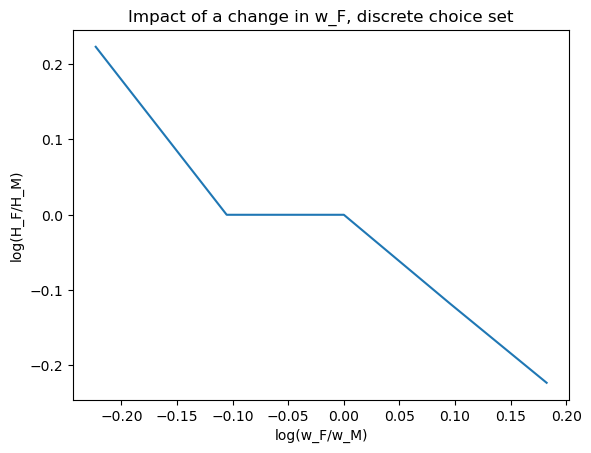

In [3]:
for w_F in hoc.par.w_F_vec:
    hoc.par.w_F=w_F
    solve=hoc.solve_discrete()
    print(f'H_F = {solve.H_F}, H_M = {solve.H_M}, w_F = {w_F}, log(HF/HM) = {np.log(solve.H_F/solve.H_M):6.3}, log(w_F/w_M)={np.log(w_F/hoc.par.w_M):6.3}')
# reset w_F
hoc.par.w_F=1.0
  
# create log(W_F/W_M)
log_w_F_w_M=np.log(hoc.par.w_F_vec)
# create empty list to store values for log(H_F/H_M)
disc_log_H_F_H_M=[]

# run loop to find values for each w_F
for w_F in hoc.par.w_F_vec:
    hoc.par.w_F = w_F
    value = np.log(hoc.solve_discrete().H_F/hoc.solve_discrete().H_M)
    disc_log_H_F_H_M.append(value)
# reset w_F
hoc.par.w_F = 1.0

# a. create the figure
discfig = plt.figure()

# b. plot
discax = discfig.add_subplot(1,1,1)
discax.plot(log_w_F_w_M,disc_log_H_F_H_M)
discax.set_title('Impact of a change in w_F, discrete choice set')
discax.set_xlabel('log(w_F/w_M)')
discax.set_ylabel('log(H_F/H_M)')

From this we see, that as women's wages increase, they begin working less at home in comparison to men. This should be expected, as the opportunity cost to work at home for women relative to men increases and as such makes it more viable for women to work in the labor market while men work at home.

# Question 3

I do the same as in question 2 but this time for continued time.

H_F = 5.116, H_M = 4.0926, w_F = 0.8, log(HF/HM) =   0.223, log(w_F/w_M)= -0.223
H_F = 4.745, H_M = 4.2709, w_F = 0.9, log(HF/HM) =   0.105, log(w_F/w_M)= -0.105
H_F = 4.454, H_M = 4.4543, w_F = 1.0, log(HF/HM) =     0.0, log(w_F/w_M)=    0.0
H_F = 4.218, H_M = 4.6412, w_F = 1.1, log(HF/HM) = -0.0955, log(w_F/w_M)= 0.0953
H_F = 4.027, H_M = 4.8323, w_F = 1.2, log(HF/HM) =  -0.182, log(w_F/w_M)=  0.182


Text(0, 0.5, 'log(H_F/H_M)')

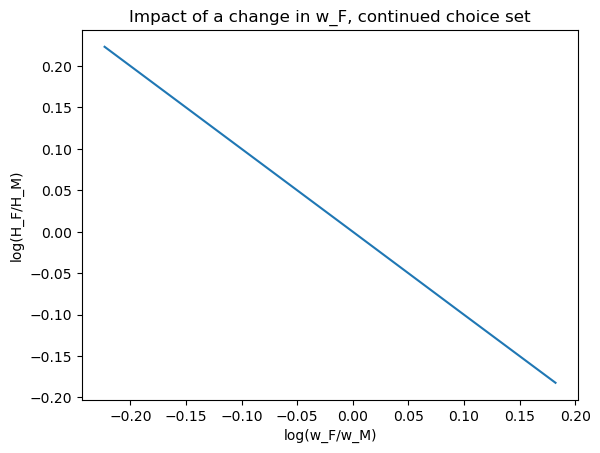

In [4]:
# Set the inital guess to 4.5 for H and L variables, as this was the answer in discrete time
for w_F in hoc.par.w_F_vec:
    hoc.par.w_F=w_F
    solve=hoc.solve_continued()
    print(f'H_F = {solve.H_F:.4}, H_M = {solve.H_M:6.5}, w_F = {w_F}, log(HF/HM) = {np.log(solve.H_F/solve.H_M):7.3}, log(w_F/w_M)={np.log(w_F/hoc.par.w_M):7.3}')
#reset w_F
hoc.par.w_F=1

#create the vectors to plot in the graph
hoc.solve_w_F_vec()
log_w_F_w_M=np.log(hoc.par.w_F_vec)
cont_log_H_F_H_M=np.log(hoc.sol.H_F_vec/hoc.sol.H_M_vec)

#create the plot
contfig = plt.figure()
contax = contfig.add_subplot(1,1,1)
contax.plot(log_w_F_w_M,cont_log_H_F_H_M)
contax.set_title('Impact of a change in w_F, continued choice set')
contax.set_xlabel('log(w_F/w_M)')
contax.set_ylabel('log(H_F/H_M)')

We genereally see the same effect for a continuous choice set, though the slope in this case is completely linear.

# Question 4

We find the optimal values for $\alpha$ ∈ [0,1] and $\sigma$ ∈ [0,1.5], with the initial guess being the standard values for the model

In [5]:
hoc.estimate()

c:\Users\frede\OneDrive\Dokumenter\6. Semester Økonomi\Programmering\Ting\projects-2023-tgr401\inauguralproject\Final_inauguralproject.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*H_M**((par.sigma-1)/par.sigma)+par.alpha*H_F**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\frede\OneDrive\Dokumenter\6. Semester Økonomi\Programmering\Ting\projects-2023-tgr401\inauguralproject\Final_inauguralproject.py:65: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*H_M**((par.sigma-1)/par.sigma)+par.alpha*H_F**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 beta differences: 1.51e-09
 alpha: 0.982, sigma: 0.0997, beta0: 0.4, beta1: -0.1


(0.9822570445230676, 0.09966792016348056)

From the results we find that a high $\alpha$ value of 0.98 is optimal while $\sigma$ has a low value of 0.1 relative to the standard value set.

Interpreting these results, the high $\alpha$ value suggests that it is more efficient that women are more productive in the home. An $\alpha$ that high leads to women to be 55x more productive than men.

The $\sigma$ of 0.1 suggests that there is a low degree of substitutability in home production, which means that despite the productivity difference, it is still more efficient for both parties to participate in home production, as the type of home production they do is not easily transferable.

Overall, the results from this model suggests that though women are more productive, the home production should still me split relatively evenly.

# Question 5

With a fixed alpha of 0.5, we see that the model no longer matches the data so well:

In [6]:
#Create a new class for the model but with a fixed alpha
FixA = model.OGModelFixedAlpha()
FixA.par.alpha=0.5
FixA.solve_continued()
FixA.solve_w_F_vec()
FixA.regression()
FixA.estimate()

 beta differences: 0.17
 alpha: 0.5, sigma: [0.], beta0: 0.0, beta1: 0.0


array([0.])

I therefore implement a new change to the model. Instead of women being more productive than men, we instead assume, that men get a higher disutility from work in the home. Since women were 55x more productive in the original model, we use a factor 55 in the disutility for men to get the expression: $$55*\nu*\frac{H_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}$$

In [7]:
#create the new model class with the disutility for men and the fixed alpha
hoc5 = model.Modelchange()
hoc5.par.alpha=0.5
hoc5.solve_continued()
hoc5.solve_w_F_vec()
hoc5.regression()
hoc5.estimate()

c:\Users\frede\OneDrive\Dokumenter\6. Semester Økonomi\Programmering\Ting\projects-2023-tgr401\inauguralproject\Final_inauguralproject.py:274: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*H_M**((par.sigma-1)/par.sigma)+par.alpha*H_F**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 beta differences: 3.79e-06
 alpha: 0.5, sigma: [0.17861328], beta0: 0.399, beta1: -0.102


array([0.17861328])

We see from the results, that they match the empirical data quite well with a $\beta_0$ of 0.399 and a $\beta_1$ of -0.102, which are both almost identical to the results from the original model.

With the $\alpha$ fixed at 0.5, we instead get an 80% increase in $\sigma$ from 0.0997 to 0.1786, which suggests that women now do more of the work at home.